<a href="https://colab.research.google.com/github/MoralesCMaJo/Tarea-2--An-lisis-de-series-temporales/blob/main/123.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
pip install pandas yfinance matplotlib numpy


In [19]:
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")

# Descargar los datos utilizando el método .download()
raw_data = yf.download(tickers="^GSPC ^FTSE ^N225 ^GDAXI", start="1994-01-07", end="2023-09-23", interval="1d", group_by='ticker', auto_adjust=True, threads=True)

# Crear una copia de respaldo en caso de que se necesite
df_comp = raw_data.copy()

# Agregar nuevas columnas al conjunto de datos
df_comp['spx'] = df_comp['^GSPC'].Close
df_comp['dax'] = df_comp['^GDAXI'].Close
df_comp['ftse'] = df_comp['^FTSE'].Close
df_comp['nikkei'] = df_comp['^N225'].Close

# Eliminar la primera fila si es necesario (ajustar a tus requisitos)
# df_comp = df_comp.iloc[1:]

# Eliminar los tickers originales del conjunto de datos
del df_comp['^N225']
del df_comp['^GSPC']
del df_comp['^GDAXI']
del df_comp['^FTSE']

# Establecer la frecuencia de los datos a días hábiles
df_comp = df_comp.asfreq('B')

# Rellenar valores faltantes hacia adelante
df_comp = df_comp.fillna(method='ffill')
# Restablecer el índice para que "Date" sea una columna
df_comp = df_comp.reset_index()

print(df_comp.head()) # Mostrar las primeras 5 filas para verificar la descarga
print(df_comp.tail()) # Verificar la última fecha en la serie

from google.colab import drive
drive.mount('/content/drive')

# Supongamos que ya tienes un DataFrame llamado 'df_comp' con tus datos

# Especifica el nombre del archivo CSV
nombre_archivo_csv = "Index_2023.csv"  # Reemplaza 'tu_archivo.csv' con el nombre que desees

# Guarda el DataFrame en un archivo CSV en Google Colab
df_comp.to_csv("Index_2023.csv", index=True)

# Mueve el archivo CSV a tu unidad de Google Drive
import shutil
ruta_destino_drive = "/content/drive/My Drive/" + "Index_2023.csv"
shutil.move("Index_2023.csv", ruta_destino_drive)

# Asegúrate de que los datos se hayan guardado en Google Drive
print(f"Los datos se han guardado en Google Drive en {ruta_destino_drive}.")

[*********************100%%**********************]  4 of 4 completed
        Date         spx          dax         ftse        nikkei
                                                                
0 1994-01-07  469.899994  2224.949951  3446.000000  18124.009766
1 1994-01-10  475.269989  2225.000000  3440.600098  18443.439453
2 1994-01-11  474.130005  2228.100098  3413.800049  18485.250000
3 1994-01-12  474.170013  2182.060059  3372.000000  18793.880859
4 1994-01-13  472.470001  2142.370117  3360.000000  18577.259766
           Date          spx           dax         ftse        nikkei
                                                                     
7746 2023-09-18  4453.529785  15727.120117  7652.899902  33533.089844
7747 2023-09-19  4443.950195  15664.480469  7660.200195  33242.589844
7748 2023-09-20  4402.200195  15781.589844  7731.700195  33023.781250
7749 2023-09-21  4330.000000  15571.860352  7678.600098  32571.029297
7750 2023-09-22  4320.060059  15557.290039  7683.899902 

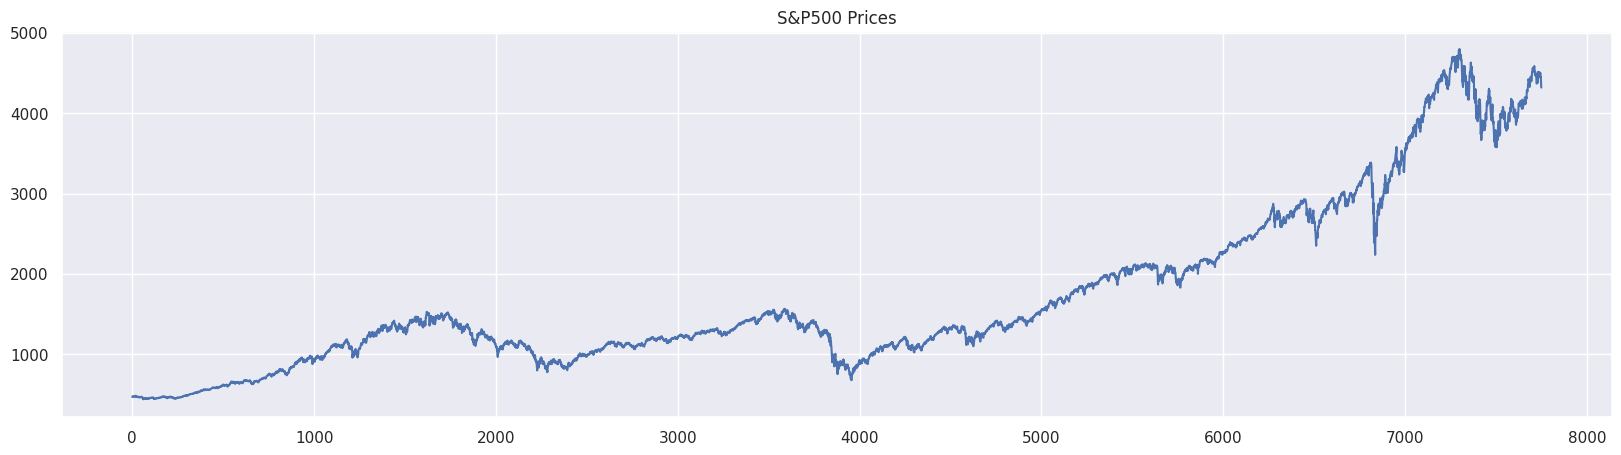

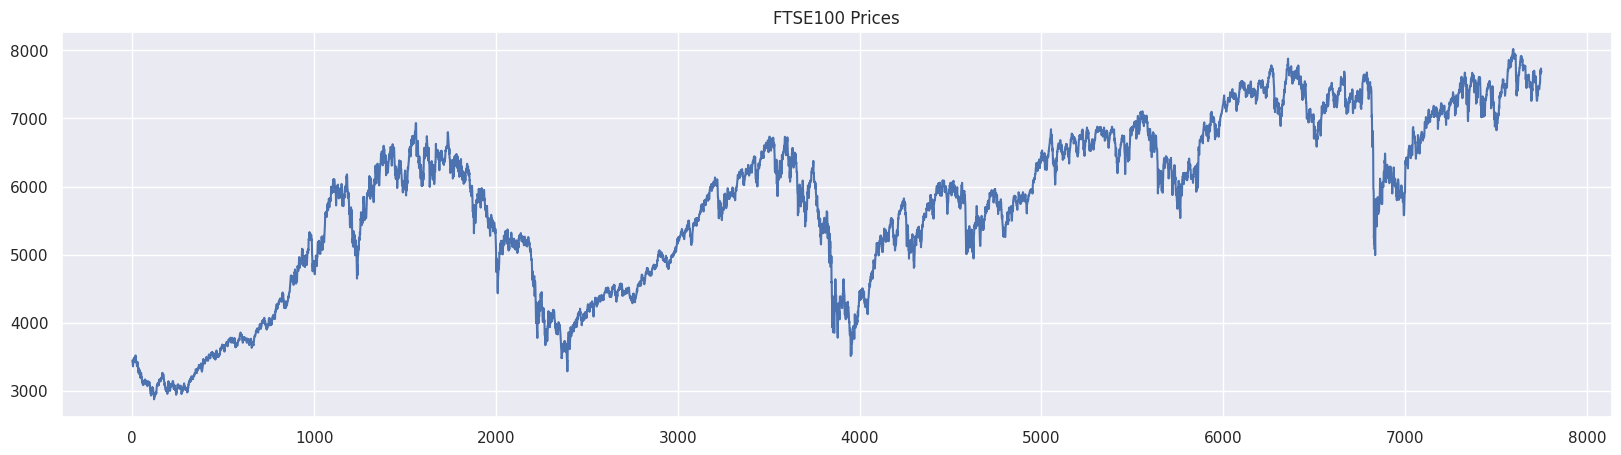

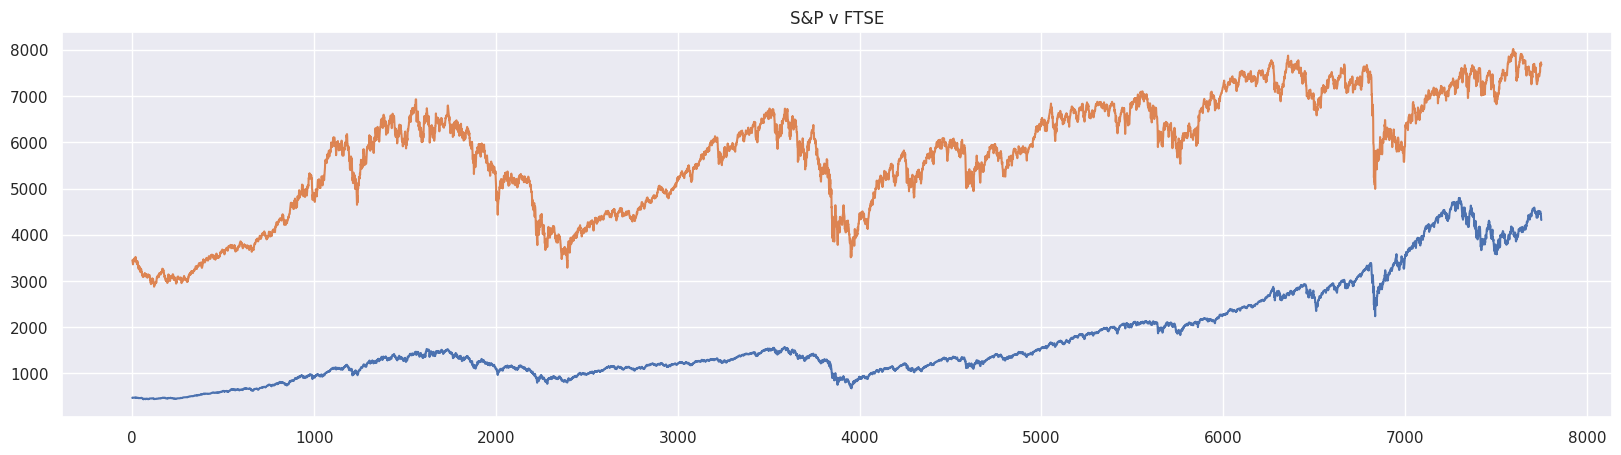

In [20]:
#PRIMER EJERCICIO:
df_comp.head()

df_comp

df_comp.describe()

df_comp.isna()

df_comp.spx.isna().sum()

import matplotlib.pyplot as plt
df_comp.spx.plot(figsize=(20,5), title = "S&P500 Prices")
plt.show()

df_comp.ftse.plot(figsize=(20,5), title = "FTSE100 Prices")
plt.show()

df_comp.spx.plot(figsize=(20,5), title = "S&P500 Prices")
df_comp.ftse.plot(figsize=(20,5), title = "FTSE100 Prices")
plt.title("S&P v FTSE")
plt.show()

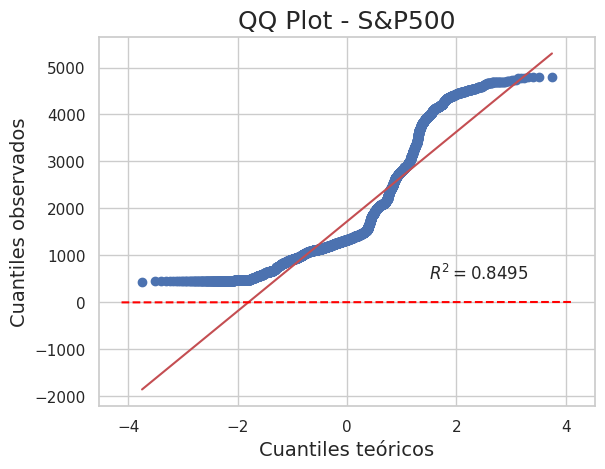

In [21]:
import scipy.stats
import pylab
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo de Seaborn
sns.set(style="whitegrid")

# Crear un QQ Plot
scipy.stats.probplot(df_comp.spx, plot=pylab, dist="norm", fit=True, rvalue=True)
plt.title("QQ Plot - S&P500", size=18)
plt.xlabel("Cuantiles teóricos", size=14)
plt.ylabel("Cuantiles observados", size=14)

# Añadir una línea diagonal de referencia
plt.plot([pylab.xlim()[0], pylab.xlim()[1]], [pylab.xlim()[0], pylab.xlim()[1]], color='red', linestyle='--')

# Mostrar el gráfico
plt.show()

In [22]:
#Pregunta 2
# Punto 2
import pandas as pd
import numpy as np
# Duración del período de tiempo
df_comp.describe()
df_comp.head()
df_comp.Date.describe()
# Del texto a la fecha
df_comp.Date = pd.to_datetime(df_comp.Date, dayfirst = True)
df_comp.head()
df_comp.Date.describe()

# Configurar el índice
df_comp.set_index("Date")
df_comp.set_index("Date", inplace=True)
df_comp.head()
# Configuración de la frecuencia deseada
df_comp=df_comp.asfreq('d')
df_comp

df_comp=df_comp.asfreq('b')
df_comp.head()
# Manejo de valores faltantes
df_comp.isna()
df_comp.isna().sum()
df_comp
df_comp.spx=df_comp.spx.fillna(method='ffill')
df_comp.isna().sum()
df_comp.ftse=df_comp.ftse.fillna(method='bfill')
df_comp.dax=df_comp.dax.fillna(value = df_comp.dax.mean())

# Simplificando el conjunto de datos
df_comp['market_value']=df_comp.spx
df_comp.describe()
del df_comp['spx']
df_comp.describe()

del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
df_comp.describe()

# Dividiendo los datos
size = int(len(df_comp)*0.8)
df = df_comp.iloc[:size]
df_test = df_comp.iloc[size:]
df.tail()

,market_value
,
Date,
2017-10-06,2549.330078
2017-10-09,2544.729980
2017-10-10,2550.639893
2017-10-11,2555.239990
2017-10-12,2550.929932


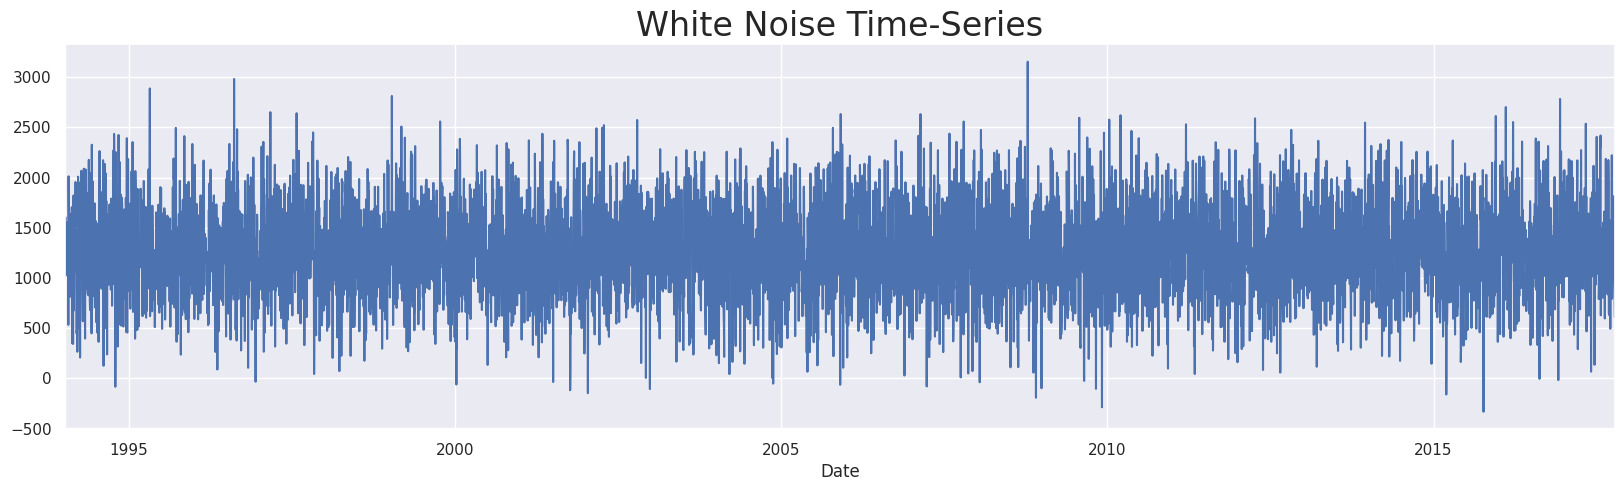

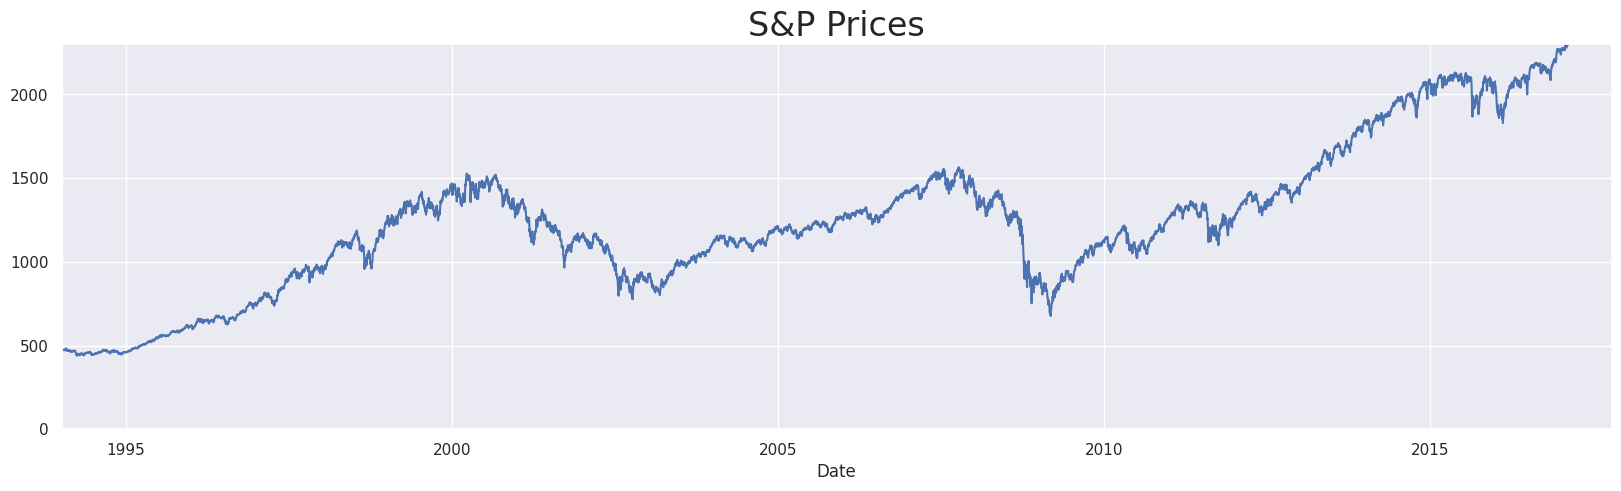

In [26]:
#Pregunta 3
# Importación de paquetes relevantes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

# Eliminación de datos excedentes
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

# Ruido blanco
wn = np.random.normal(loc = df.market_value.mean(), scale = df.market_value.std(), size = len(df))
df['wn'] = wn
df.describe()

#Serie de tiempo de ruido blanco
df.wn.plot(figsize = (20,5))
plt.title("White Noise Time-Series", size= 24)
plt.show()

# Precios S&P
df.market_value.plot(figsize=(20,5))
plt.title("S&P Prices", size = 24)
plt.ylim(0,2300)
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


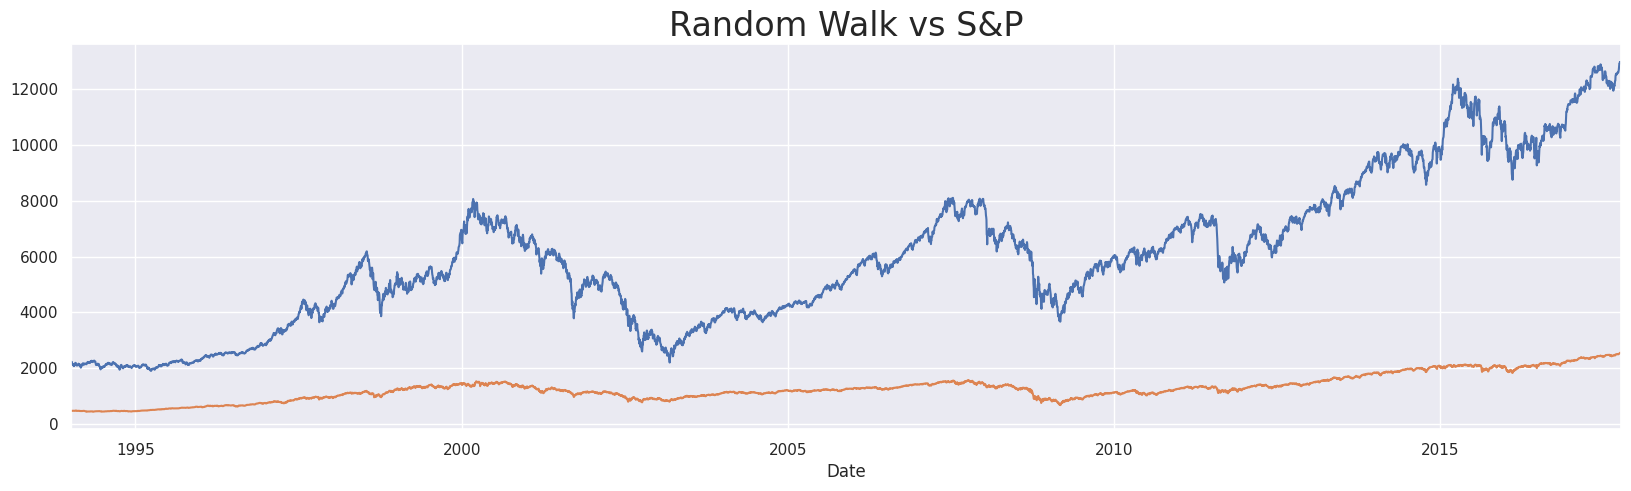

In [28]:
#Antes sube el archivo de RandWalk CSV (desarga la base de datos- y cambia dax por price)
from google.colab import drive
drive.mount('/content/drive')

import shutil

# Ruta del archivo en Google Drive
ruta_drive = "/content/drive/My Drive/RandWalk.csv"

# Ruta de destino en Google Colab
ruta_colab = "/content/RandWalk.csv"

# Copia el archivo desde Google Drive a Google Colab
shutil.copy(ruta_drive, ruta_colab)

rw = pd.read_csv("RandWalk.csv")
rw.Date = pd.to_datetime(rw.Date, dayfirst = True)
rw.set_index("Date", inplace = True)
rw = rw.asfreq('b')
rw.describe()
df['rw'] = df['market_value']
df['rw'] = rw.price
df.head()

df.rw.plot(figsize = (20,5))
df.market_value.plot()
plt.title("Random Walk vs S&P", size = 24)
plt.show()

ADF Statistic (market_value): 0.26382317797912613
P-value (market_value): 0.9756224580658177
ADF Statistic (wn): -78.58850245018725
P-value (wn): 0.0
ADF Statistic (rw): -0.14301061448544708
P-value (rw): 0.9449824015637772


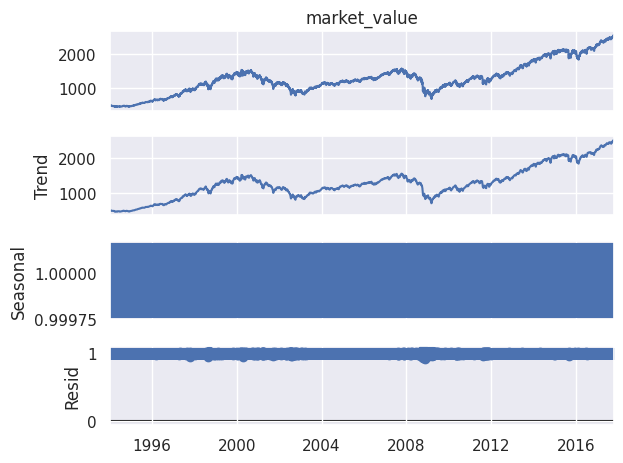

In [29]:
# Importar el módulo de statsmodels
import statsmodels.api as sm

# Prueba de estacionariedad en la serie 'market_value'
adf_market_value = sm.tsa.adfuller(df.market_value)
print("ADF Statistic (market_value):", adf_market_value[0])
print("P-value (market_value):", adf_market_value[1])

# Prueba de estacionariedad en la serie 'wn'
adf_wn = sm.tsa.adfuller(df.wn)
print("ADF Statistic (wn):", adf_wn[0])
print("P-value (wn):", adf_wn[1])


# Prueba de estacionariedad en la serie 'rw'
adf_rw = sm.tsa.adfuller(df.rw)
print("ADF Statistic (rw):", adf_rw[0])
print("P-value (rw):", adf_rw[1])


# Seasonality
s_dec_multiplicative = seasonal_decompose(df.market_value, model = "multiplicative")
s_dec_multiplicative.plot()
plt.show()

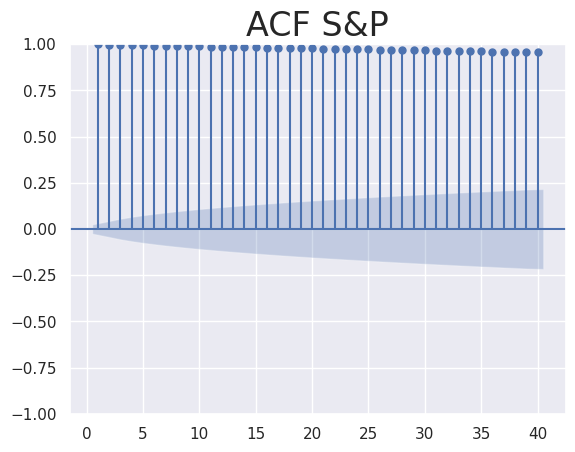

In [30]:
# ACF
sgt.plot_acf(df.market_value, lags = 40, zero = False)
plt.title("ACF S&P", size = 24)
plt.show()

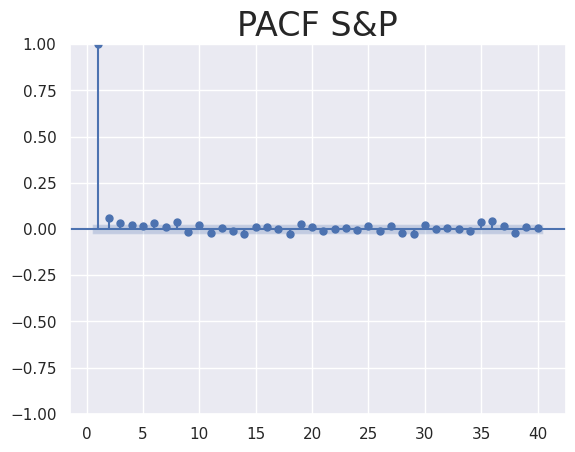

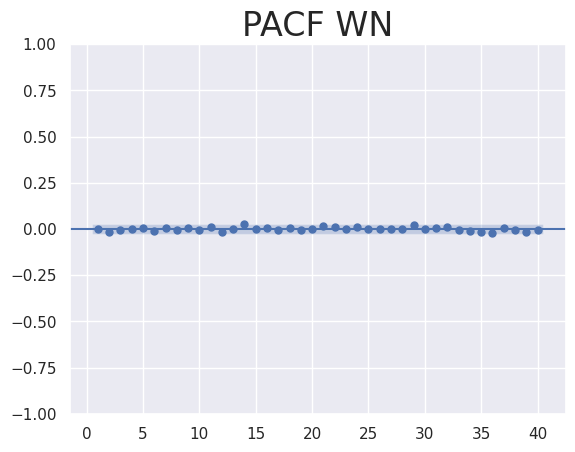

In [31]:
# PACF
sgt.plot_pacf(df.market_value, lags = 40, zero = False, method = ('ols'))
plt.title("PACF S&P", size = 24)
plt.show()

sgt.plot_pacf(df.wn, lags = 40, zero = False, method = ('ols'))
plt.title("PACF WN", size = 24)
plt.show()
